In [16]:
import torch
import numpy as np
import matplotlib.pyplot as plt

def h_1(x):
    return 1
def h_2(x):
    return x
def h_3(x):
    return x**2

h = [h_1, h_2, h_3]

def m(x, beta):
    return sum([beta[i] * h[i](x) for i in range(3)])

def sigma_2(x, beta):
    return sum([(beta[3+i] * h[i](x))**2 for i in range(3)])

def log_normal_pdf(y, mu, sigma):
    return -1/2*(torch.log(2*np.pi*sigma**2) + ((y-mu)/sigma)**2)

def log_lik(x, y, beta):
    return sum([log_normal_pdf(y_i, m(x_i, beta), sigma_2(x_i, beta)) for y_i, x_i in zip(y,x)])


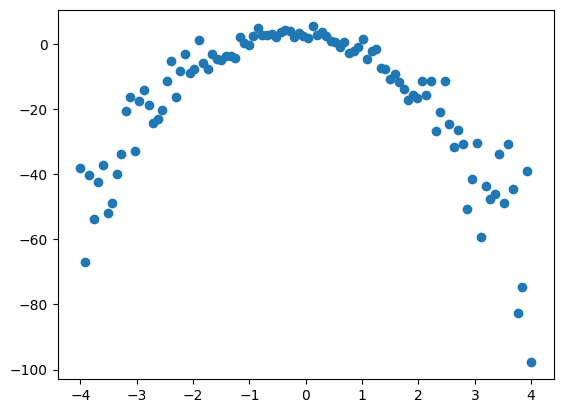

0 tensor([-0.1000,  0.1000,  0.1000,  0.9000,  0.9000,  1.1000],
       dtype=torch.float64, requires_grad=True)
5 tensor([-0.5680,  0.5942, -0.1427,  0.4541,  0.4935,  1.5327],
       dtype=torch.float64, requires_grad=True)
10 tensor([-0.9454,  1.0415, -0.5296,  0.1107,  0.1379,  1.2791],
       dtype=torch.float64, requires_grad=True)
15 tensor([-1.1898,  1.2188, -0.7843, -0.1264, -0.1028,  1.0374],
       dtype=torch.float64, requires_grad=True)
20 tensor([-1.3400,  1.3685, -0.9361, -0.2763, -0.2527,  0.8871],
       dtype=torch.float64, requires_grad=True)
25 tensor([-1.4337,  1.4619, -1.0310, -0.3699, -0.3463,  0.7934],
       dtype=torch.float64, requires_grad=True)
30 tensor([-1.4925,  1.5206, -1.0905, -0.4286, -0.4050,  0.7345],
       dtype=torch.float64, requires_grad=True)
35 tensor([-1.5294,  1.5574, -1.1279, -0.4654, -0.4418,  0.6976],
       dtype=torch.float64, requires_grad=True)
40 tensor([-1.5525,  1.5804, -1.1513, -0.4885, -0.4649,  0.6745],
       dtype=torch.float

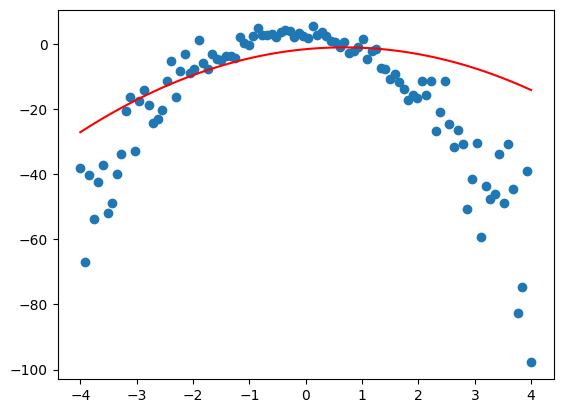

[-1.59010827  1.61832258 -1.19000259 -0.52607829 -0.50244751  0.63681156]


In [18]:

torch.seed = (1)
N = 100
x = torch.linspace(-4, 4, N)
y = (torch.randn(N)+-4) * x**2 + (-2+torch.randn(N)) * x + (3+torch.randn(N))

beta = torch.tensor([0., 0., 0., 1., 1., 1.], dtype=float, requires_grad=True)

plt.scatter(x, y)
plt.show()

optimizer = torch.optim.Adam([beta],lr=0.1)
for epoch in range(100):
    optimizer.zero_grad()
    loss = log_lik(x, y, beta)
    loss.backward()
    optimizer.step()
    if epoch%5==0:
        print(epoch, beta)
beta = beta.detach().numpy()
plt.show()
plt.scatter(x,y)
plt.plot(x, beta[2]*x**2+beta[1]*x+beta[0], 'r-')
#plt.plot(x, (aMax-aVar**0.5)*x**2+bMax*x+cMax, 'r--')
#plt.plot(x, (aMax+aVar**0.5)*x**2+bMax*x+cMax, 'r--')
plt.show()
print(beta)